In [1]:
%matplotlib inline
# %matplotlib ipympl
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=8,8

import numpy as np
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [2]:
from keras.datasets import cifar10

from keras.models import Sequential, load_model
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D

import tensorflow as tf

https://www.cs.toronto.edu/~kriz/cifar.html

In [3]:
(X, y), (_, _) = cifar10.load_data()

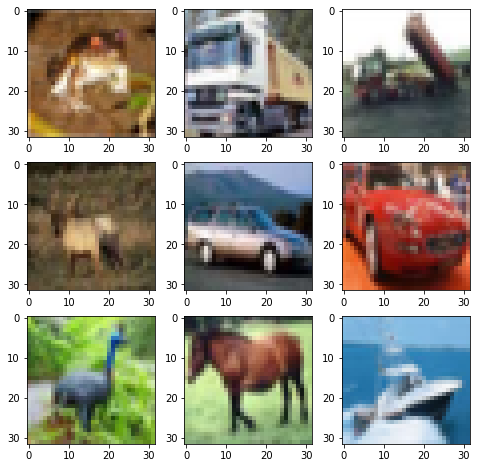

In [4]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X[i])

In [5]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state=42)

In [6]:
X_train.shape

(33500, 32, 32, 3)

In [7]:
X_valid.shape

(16500, 32, 32, 3)

In [8]:
y_train.shape

(33500, 1)

In [9]:
y_train = np_utils.to_categorical(y_train)
y_valid = np_utils.to_categorical(y_valid)

In [10]:
y_train.shape

(33500, 10)

In [11]:
y_valid.shape

(16500, 10)

In [12]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [13]:
X_train_norm = X_train.astype('float32') / 255
X_valid_norm = X_valid.astype('float32') / 255

In [23]:
model = Sequential()

model.add(Conv2D(30, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(30, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(100, activation="relu", name="1"))
model.add(Dense(100, activation="relu"))


model.add(Dense(100, activation="relu"))

model.add(Dense(10, activation="softmax", name="classification"))

In [24]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [25]:
history = model.fit(X_train_norm, y_train,
          batch_size=64, epochs=15,
          verbose=2,
          validation_data=(X_valid_norm, y_valid))

Epoch 1/15
524/524 - 30s - loss: 1.6289 - accuracy: 0.3977 - val_loss: 1.3576 - val_accuracy: 0.5058
Epoch 2/15
524/524 - 27s - loss: 1.2391 - accuracy: 0.5540 - val_loss: 1.1363 - val_accuracy: 0.5961
Epoch 3/15
524/524 - 35s - loss: 1.0686 - accuracy: 0.6219 - val_loss: 1.0676 - val_accuracy: 0.6196
Epoch 4/15
524/524 - 30s - loss: 0.9630 - accuracy: 0.6601 - val_loss: 1.0145 - val_accuracy: 0.6467
Epoch 5/15
524/524 - 29s - loss: 0.8854 - accuracy: 0.6869 - val_loss: 1.0401 - val_accuracy: 0.6382
Epoch 6/15
524/524 - 28s - loss: 0.8208 - accuracy: 0.7109 - val_loss: 0.9430 - val_accuracy: 0.6702
Epoch 7/15
524/524 - 28s - loss: 0.7588 - accuracy: 0.7325 - val_loss: 0.9748 - val_accuracy: 0.6661
Epoch 8/15
524/524 - 27s - loss: 0.7120 - accuracy: 0.7498 - val_loss: 0.9648 - val_accuracy: 0.6728
Epoch 9/15
524/524 - 27s - loss: 0.6566 - accuracy: 0.7662 - val_loss: 1.0102 - val_accuracy: 0.6711
Epoch 10/15
524/524 - 27s - loss: 0.6046 - accuracy: 0.7851 - val_loss: 0.9688 - val_accura

In [26]:
model.save('competition_model')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: competition_model/assets
